In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("C:\\Users\\ajara\\Downloads")
data_set = pd.read_csv("SampleSuperstore.csv")
data_set

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
#To print top 10 records in dataset
print(data_set.head(10))

#To know the number of observations and variables in dataset
print(data_set.shape)

#To see how data has been spread for numerical values
print(data_set.describe())

#To check the Information about data and datatypes of each respective attribute
print(data_set.info())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   
7  Standard Class   Consumer  United States      Los Angeles  California   
8  Standard Class   Consumer  United States      Los Angeles  California   
9  Standard Class   Consumer  United States      Los Angeles  California   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        4242

In [6]:
# To check for missing values from columns
data_set.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#To check for the duplicate data
dup = data_set.duplicated()
print(dup.sum())
print(data_set[dup])

17
           Ship Mode      Segment        Country           City         State  \
950   Standard Class  Home Office  United States   Philadelphia  Pennsylvania   
3406  Standard Class  Home Office  United States       Columbus          Ohio   
3670  Standard Class     Consumer  United States          Salem        Oregon   
4117  Standard Class     Consumer  United States    Los Angeles    California   
4553  Standard Class     Consumer  United States  San Francisco    California   
5905        Same Day  Home Office  United States  San Francisco    California   
6146  Standard Class    Corporate  United States  San Francisco    California   
6334  Standard Class     Consumer  United States  New York City      New York   
6357  Standard Class    Corporate  United States        Seattle    Washington   
7608  Standard Class     Consumer  United States  San Francisco    California   
7735  Standard Class    Corporate  United States        Seattle    Washington   
7759  Standard Class    C

In [9]:
#To drop duplicates
data_set.drop_duplicates(inplace = True)

#Check for duplicates
data_set.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

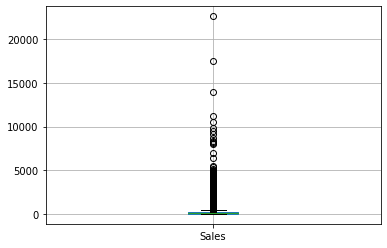

In [10]:
#Boxplot to identify outliers
data_set.boxplot(column = ["Sales"])
plt.show

<AxesSubplot:>

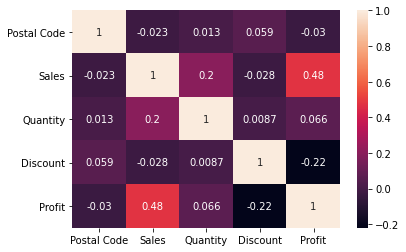

In [11]:
#Finding the relations between the variables
cor = data_set.corr()
sns.heatmap(cor, annot = True)

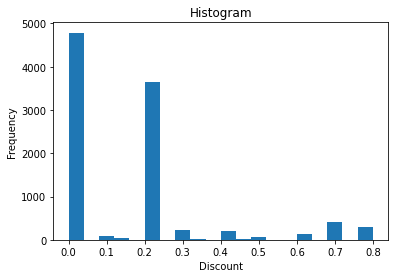

In [12]:
#Plotting Histogram
plt.hist(data_set['Discount'],bins = 20)
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

<AxesSubplot:xlabel='Region'>

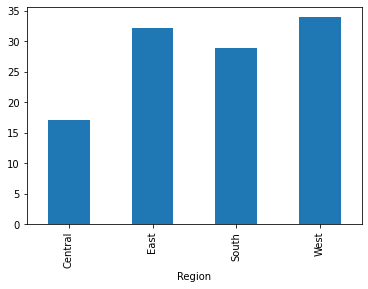

In [13]:
#To perform data analysis task using groupby
data_set.groupby(data_set['Region'])['Profit'].mean().plot.bar()

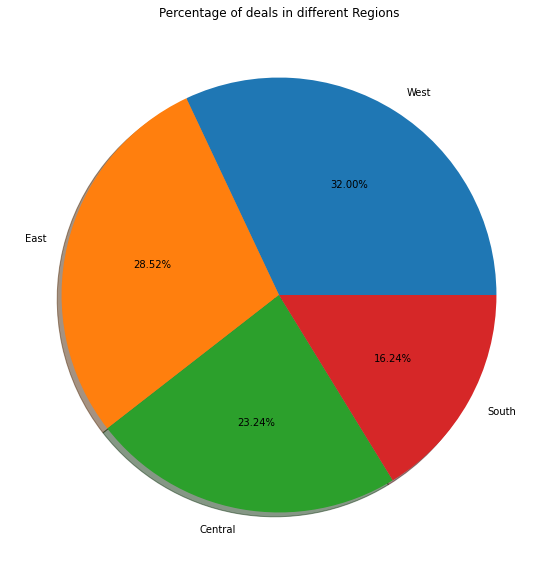

In [17]:
#To plot a pie chart
fig = plt.figure(figsize = (50,10))
plt.pie(data_set["Region"].value_counts(),labels = data_set["Region"]
       .value_counts().index,autopct='%1.2f%%',shadow = True)
plt.title("Percentage of deals in different Regions")
plt.show()

<AxesSubplot:>

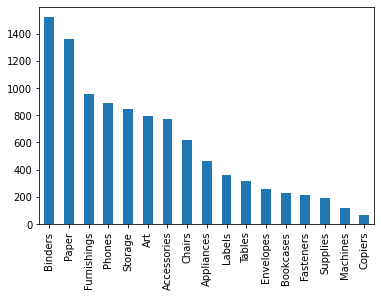

In [18]:
#To visualize Count
data_set['Sub-Category'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Sub-Category'>

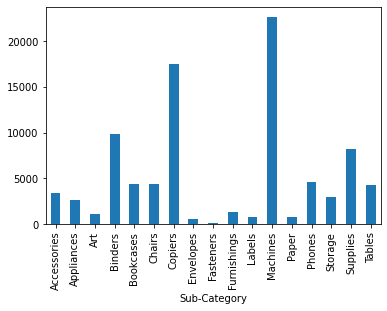

In [19]:
#To perform data analysis task using groupby
data_set.groupby(data_set['Sub-Category'])['Sales'].max().plot.bar()

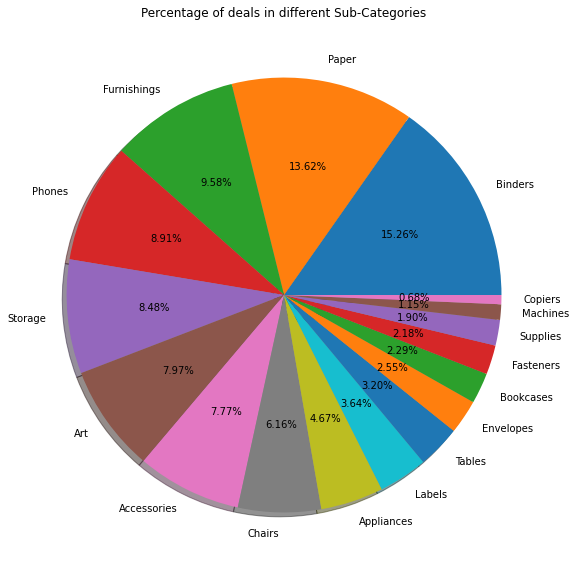

In [20]:
#To plot a pie chart
fig = plt.figure(figsize = (50,10))
plt.pie(data_set["Sub-Category"].value_counts(),labels = data_set["Sub-Category"]
       .value_counts().index,autopct='%1.2f%%',shadow = True)
plt.title("Percentage of deals in different Sub-Categories")
plt.show()

In [21]:
#To find correlation between all variables
data_set.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<AxesSubplot:>

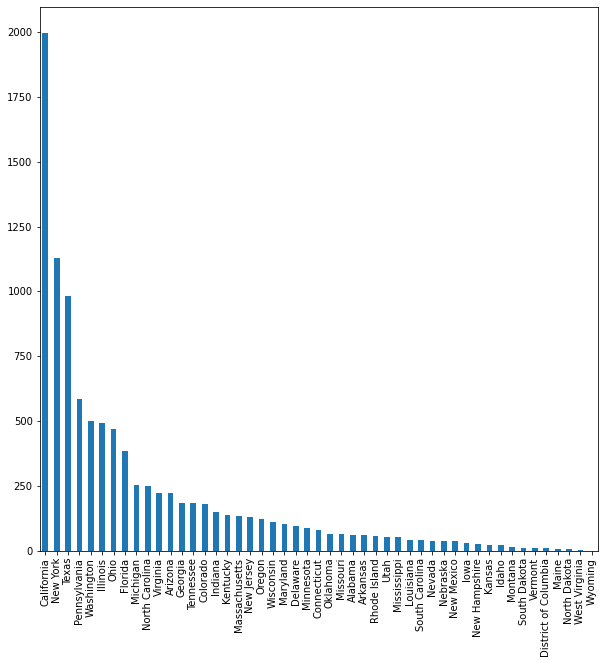

In [22]:
#To get count of each category in a categorical attributed series of values
print(data_set['State'].value_counts())
data_set['State'].value_counts().plot(kind = 'bar',figsize=(10,10))

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

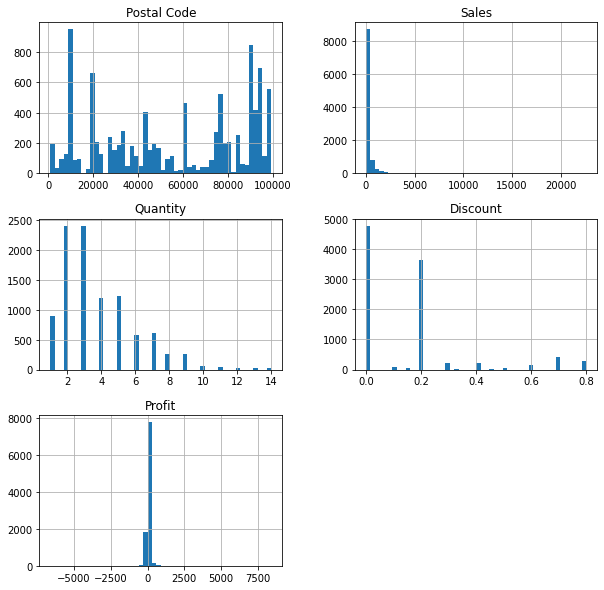

In [23]:
data_set.hist(figsize = (10,10),bins=50)

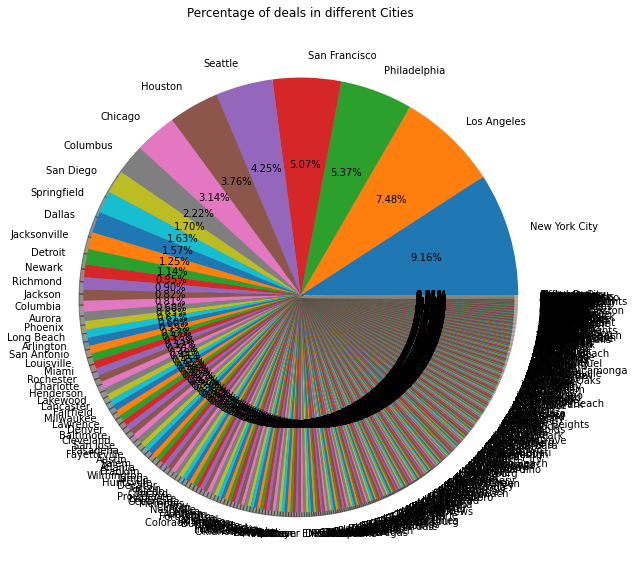

In [24]:
#To plot a pie chart
fig = plt.figure(figsize = (50,10))
plt.pie(data_set["City"].value_counts(),labels = data_set["City"]
       .value_counts().index,autopct='%1.2f%%',shadow = True)
plt.title("Percentage of deals in different Cities")
plt.show()

c:\users\ajara\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


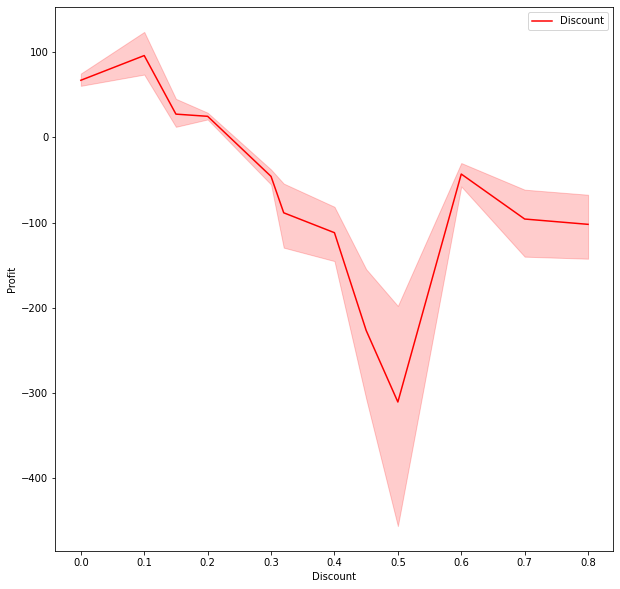

In [26]:
#To draw line plot with possibility of several semantic groupings
plt.figure(figsize = (10,10))
sns.lineplot('Discount','Profit',data = data_set,color ='red',label = 'Discount')
plt.legend()

In [28]:
pd.DataFrame(data_set.groupby('State').sum())['Profit'].sort_values(ascending = True)

State
Texas                  -25750.9833
Ohio                   -16959.3178
Pennsylvania           -15565.4035
Illinois               -12601.6500
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1194.0993
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [29]:
pd.DataFrame(data_set.groupby('State').sum())['Discount'].sort_values(ascending = True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma